#Loading Dataset & Dependencies

In [ ]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Importing the dataset
DATASET_COLUMNS=['File name','caption','label']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_excel('/content/LabeledText.xlsx')
df.sample(5)

,File Name,Caption,LABEL
3464,4350.txt,¿¹¤¦¤Ä„ˆ¤ÎÃßšÝ¤È£·¤Ä¤ÎŒ²ß http://t.co/jJffg2l...,neutral
4004,4837.txt,#HarryAppreciationDay http¡­,neutral
4655,806.txt,#hiring We are Hiring! *Do you #lovetorun #lov...,positive
291,1260.txt,Craig and Megan working the tub thing together...,negative
1594,262.txt,RT @HighburyClock: Arsenal's first-team train ...,negative


# Exploratory Data Analysis

In [ ]:
df.head()

,File Name,Caption,LABEL
0,1.txt,How I feel today #legday #jelly #aching #gym,negative
1,10.txt,@ArrivaTW absolute disgrace two carriages from...,negative
2,100.txt,This is my Valentine's from 1 of my nephews. I...,positive
3,1000.txt,betterfeelingfilms: RT via Instagram: First da...,neutral
4,1001.txt,Zoe's first love #Rattled @JohnnyHarper15,positive


In [ ]:
df.columns

Index(['File Name', 'Caption', 'LABEL'], dtype='object')

In [ ]:
print('length of data is', len(df))

length of data is 4869


In [ ]:
df.shape

(4869, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4869 entries, 0 to 4868
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   File Name  4869 non-null   object
 1   Caption    4869 non-null   object
 2   LABEL      4869 non-null   object
dtypes: object(3)
memory usage: 114.2+ KB


In [ ]:
df.dtypes

File Name    object
Caption      object
LABEL        object
dtype: object

In [ ]:
df['LABEL'].nunique()

3

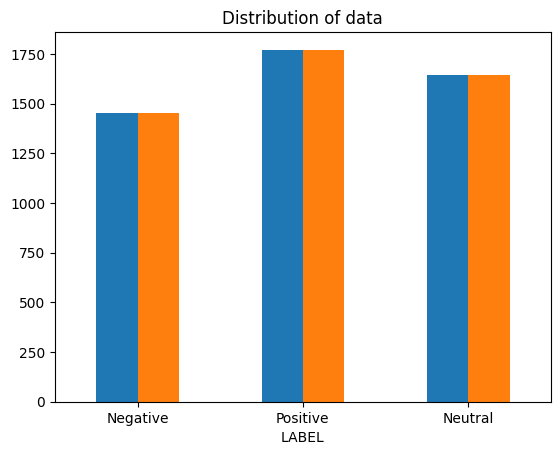

In [ ]:
# Plotting the distribution for dataset.
ax = df.groupby('LABEL').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive','Neutral'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['Caption']), list(df['LABEL'])

<Axes: xlabel='LABEL', ylabel='count'>

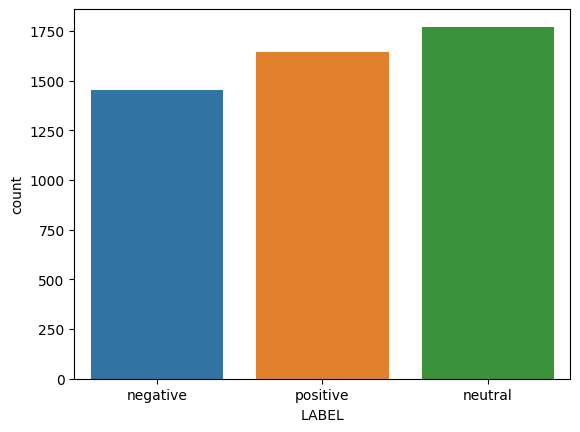

In [ ]:
import seaborn as sns
sns.countplot(x='LABEL', data=df)

# Data Pre-Processing

In [ ]:
data=df[['Caption','LABEL']]
data['LABEL'] = data['LABEL'].replace('positive',4)
data['LABEL'] = data['LABEL'].replace('neutral',2)
data['LABEL'] = data['LABEL'].replace('negative',0)

<ipython-input-12-41c9172585f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LABEL'] = data['LABEL'].replace('positive',4)
<ipython-input-12-41c9172585f7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LABEL'] = data['LABEL'].replace('neutral',2)
<ipython-input-12-41c9172585f7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [ ]:
data['LABEL'].unique()


array([0, 4, 2])

In [ ]:
data_pos = data[data['LABEL'] == 4]
data_neg = data[data['LABEL'] == 0]
data_neu = data[data['LABEL'] == 2]

In [ ]:
dataset = pd.concat([data_pos, data_neg, data_neu])

In [ ]:
dataset['Caption']=dataset['Caption'].str.lower()
dataset['Caption'].tail()

4849    get your friday night look sorted!! #newin #lb...
4859    @dbel67 #scared #veryscared don't be holding o...
4860    completely #unique #petrified #palm #earrings ...
4866                        #blue #eyes can't be #beaten 
4867                la chucha louuu te chupo los ojos..! 
Name: Caption, dtype: object

In [ ]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [ ]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['Caption'] = dataset['Caption'].apply(lambda text: cleaning_stopwords(text))
dataset['Caption'].head()

2     valentine's 1 nephews. elated; sometimes littl...
4             zoe's first love #rattled @johnnyharper15
5     chaotic love - giclee print ?65 #art #love #ch...
12    #excited announce launched #affiliate program ...
22    found cool photo, not mine ? brothers ? nephew...
Name: Caption, dtype: object

In [ ]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['Caption']= dataset['Caption'].apply(lambda x: cleaning_punctuations(x))
dataset['Caption'].tail()

4849    get friday night look sorted newin lbd littleb...
4859    dbel67 scared veryscared dont holding owt hot ...
4860    completely unique petrified palm earrings set ...
4866                                blue eyes cant beaten
4867                    la chucha louuu te chupo los ojos
Name: Caption, dtype: object

In [ ]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['Caption'] = dataset['Caption'].apply(lambda x: cleaning_repeating_char(x))
dataset['Caption'].tail()

4849    get friday night look sorted newin lbd littleb...
4859    dbel67 scared veryscared dont holding owt hot ...
4860    completely unique petrified palm earrings set ...
4866                                blue eyes cant beaten
4867                    la chucha louuu te chupo los ojos
Name: Caption, dtype: object

In [ ]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['Caption'] = dataset['Caption'].apply(lambda x: cleaning_URLs(x))
dataset['Caption'].tail()

4849    get friday night look sorted newin lbd littleb...
4859    dbel67 scared veryscared dont holding owt hot ...
4860    completely unique petrified palm earrings set ...
4866                                blue eyes cant beaten
4867                    la chucha louuu te chupo los ojos
Name: Caption, dtype: object

In [ ]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['Caption'] = dataset['Caption'].apply(lambda x: cleaning_numbers(x))
dataset['Caption'].tail()

4849    get friday night look sorted newin lbd littleb...
4859    dbel scared veryscared dont holding owt hot  w...
4860    completely unique petrified palm earrings set ...
4866                                blue eyes cant beaten
4867                    la chucha louuu te chupo los ojos
Name: Caption, dtype: object

In [ ]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
dataset['Caption'] = dataset['Caption'].apply(tokenizer.tokenize)
dataset['Caption'].head()

2     [valentines, nephews, elated, sometimes, littl...
4             [zoes, first, love, rattled, johnnyharpe]
5     [chaotic, love, giclee, print, art, love, chao...
12    [excited, announce, launched, affiliate, progr...
22    [found, cool, photo, not, mine, brothers, neph...
Name: Caption, dtype: object

In [ ]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['Caption']= dataset['Caption'].apply(lambda x: stemming_on_text(x))
dataset['Caption'].head()

2     [valentines, nephews, elated, sometimes, littl...
4             [zoes, first, love, rattled, johnnyharpe]
5     [chaotic, love, giclee, print, art, love, chao...
12    [excited, announce, launched, affiliate, progr...
22    [found, cool, photo, not, mine, brothers, neph...
Name: Caption, dtype: object

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['Caption'] = dataset['Caption'].apply(lambda x: lemmatizer_on_text(x))
dataset['Caption'].head()

2     [valentines, nephews, elated, sometimes, littl...
4             [zoes, first, love, rattled, johnnyharpe]
5     [chaotic, love, giclee, print, art, love, chao...
12    [excited, announce, launched, affiliate, progr...
22    [found, cool, photo, not, mine, brothers, neph...
Name: Caption, dtype: object

# Feature extraction and Dataset Splitting

In [ ]:
X=data.Caption
y=data.LABEL
print(X.sample(5))
print(y.sample(5))

79      RT @RebelsSpartaCon: RT if you would stand wit...
4685    Hammered myself again... #fitness #aching #NoP...
1382    Found a cold, tired, hungry, frightened black ...
2531    #¥¢¥¦¥Ç¥£TT ¤Î¥æ©`¥¶©`¤¬Ð´Õæ¤ò¥¢¥Ã¥×£¡ #auditt...
4160    ANDROGYNOUS MAN MOCKED BY BIGOTED TAXI DRIVER ...
Name: Caption, dtype: object
852     4
840     2
100     4
569     2
4094    2
Name: LABEL, dtype: int64


In [ ]:
# Separating the 90% data for training data and 10% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1, random_state =42)

In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=500000)

# Joining the list of texts into a single string
text = '\n'.join(X_train)

# Fitting the vectorizer with the prepared text
vectorizer.fit_transform([text])
print('No. of feature words: ', len(vectorizer.get_feature_names_out()))

No. of feature words:  62665


In [ ]:
X_train = vectorizer.transform(X_train)
X_test  = vectorizer.transform(X_test)

# Defining a function for Model Eval

In [ ]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative', 'Positive', 'Neutral']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(categories, group_percentages)]
    sns.heatmap(cf_matrix, annot=True, cmap='Reds', fmt='', xticklabels=categories, yticklabels=categories)
    plt.xlabel("Predicted values", fontdict={'size': 14}, labelpad=10)
    plt.ylabel("Actual values", fontdict={'size': 14}, labelpad=10)
    plt.title("Confusion Matrix", fontdict={'size': 18}, pad=20)
    plt.show()  # Display the plot

# Model Building

**Model-1: Bernoulli Naive-Bayes Classifier**

              precision    recall  f1-score   support

           0       1.00      0.16      0.27       133
           2       0.45      0.96      0.62       187
           4       0.87      0.37      0.52       167

    accuracy                           0.54       487
   macro avg       0.78      0.50      0.47       487
weighted avg       0.75      0.54      0.49       487



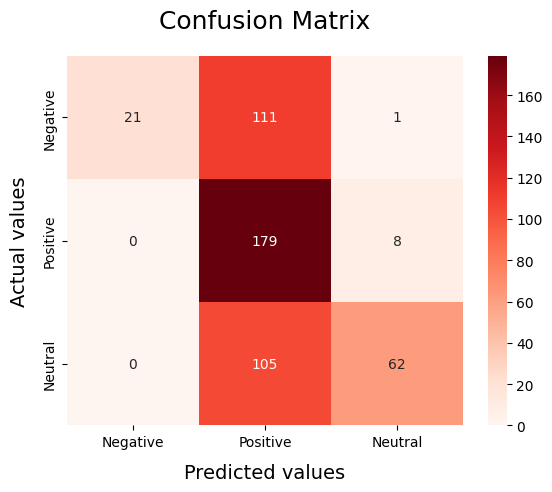

In [ ]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

def plot_roc_curve_multiclass(model):
    y_pred = model.predict_proba(X_test)

    # Binarize the labels
    y_test_bin = label_binarize(y_test, classes=[0, 2, 4])

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(len(y_test_bin[0])):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plotting the ROC curves
    plt.figure(figsize=(8, 6))

    colors = ['blue', 'green', 'red']
    for i, color in zip(range(len(y_test_bin[0])), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


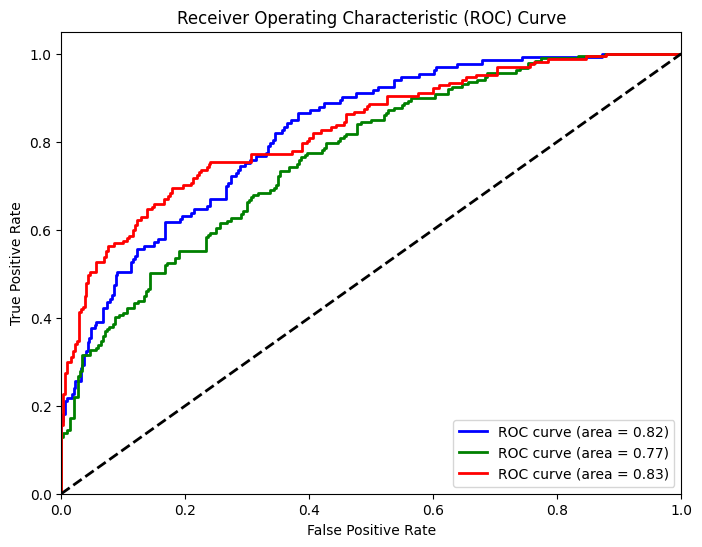

In [ ]:
M1 = plot_roc_curve_multiclass(BNBmodel)

**Model-2:Linear Support Vector Machine**

              precision    recall  f1-score   support

           0       0.64      0.71      0.67       133
           2       0.68      0.65      0.66       187
           4       0.77      0.75      0.76       167

    accuracy                           0.70       487
   macro avg       0.70      0.70      0.70       487
weighted avg       0.70      0.70      0.70       487



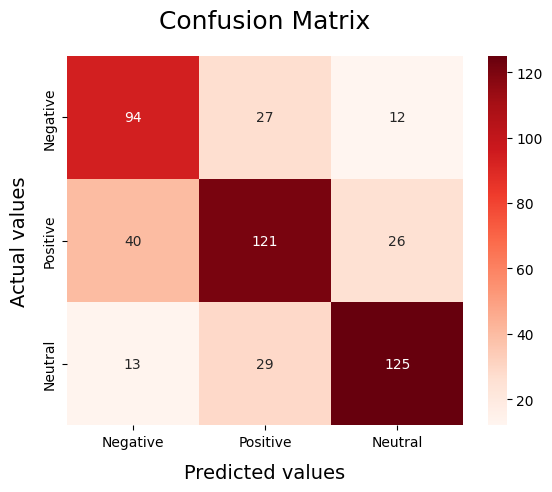

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

In [ ]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

def plot_roc_curve_multiclassSVM(model):
    y_score = model.decision_function(X_test) if isinstance(model, SVC) else model.decision_function(X_test)

    y_test_bin = label_binarize(y_test, classes=[0, 2, 4])

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(len(y_test_bin[0])):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(8, 6))
    colors = ['blue', 'green', 'red']
    for i, color in zip(range(len(y_test_bin[0])), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


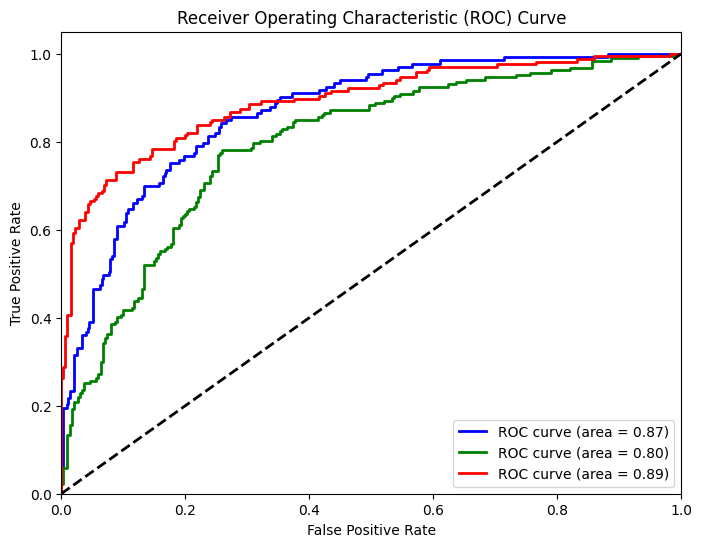

In [ ]:
M2 = plot_roc_curve_multiclassSVM(SVCmodel)

**Model-3: Logistic Regression**

              precision    recall  f1-score   support

           0       0.62      0.61      0.61       133
           2       0.64      0.66      0.65       187
           4       0.76      0.74      0.75       167

    accuracy                           0.68       487
   macro avg       0.67      0.67      0.67       487
weighted avg       0.68      0.68      0.68       487



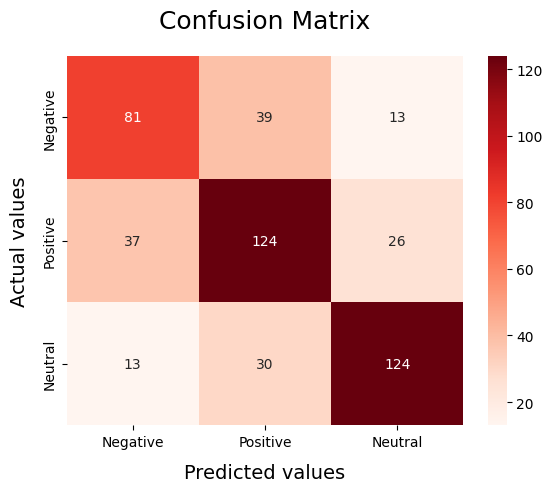

In [ ]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

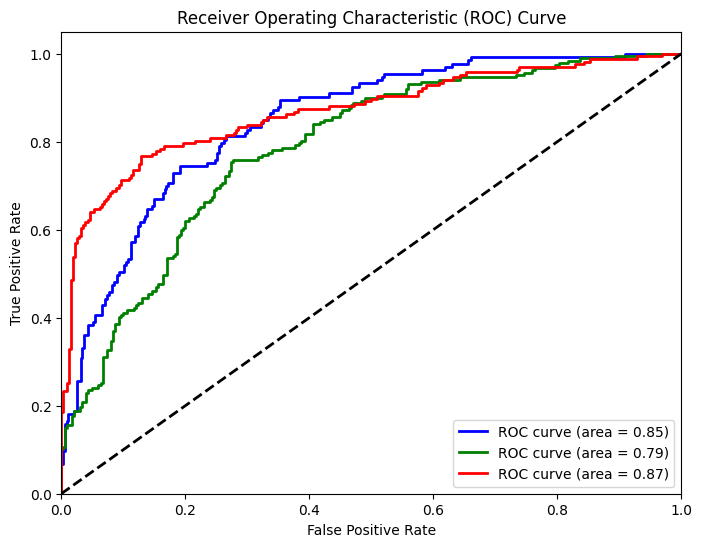

In [ ]:
M3 = plot_roc_curve_multiclass(LRmodel)